# Librerías a utilizar en el proyecto 

In [97]:
#Librerias para procesar datos
import pandas as pd
from datetime import datetime
import urllib.request
import numpy as np

# Librearías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Funciones 
def limpieza_datos(url_dataset:str, fila_final:int, columna_final:int):
    """ 
    Lee el excel y se encarga de extraer la información valiosa
    Parametros:
        url_dataset - text: dirección donde se encuentra en archivo con datos en github
        columna_final - int: la última columna que contiene datos en el archivo
        fila_final - int: la última fila que contiene datos en el archivo
    retorna: 
        DataFrame
    """ 
    df = pd.read_excel(url_dataset)
    xdf = df.iloc[15:fila_final,2:columna_final]
    xdf.iloc[0,0] = "date"
    xdf_sin_nan = xdf.dropna(how='all')
    xdf_sin_nan = xdf.dropna(axis=1)
    nuevos_nombres_columnas =  list(xdf_sin_nan.iloc[0])
    xdf_sin_nan.columns = nuevos_nombres_columnas
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    xdf_sin_nan = xdf_sin_nan.drop(0)
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    return xdf_sin_nan


def limpieza_datos_2023(url_dataset:str, fila_final:int, columna_final:int):
    """ 
    Lee el excel y se encarga de extraer la información valiosa
    Parametros:
        url_dataset - text: dirección donde se encuentra en archivo con datos en github
        columna_final - int: la última columna que contiene datos en el archivo
        fila_final - int: la última fila que contiene datos en el archivo
    retorna: 
        DataFrame
    """ 
    df = pd.read_excel(url_dataset)
    xdf = df.iloc[15:fila_final,2:columna_final]
    xdf.iloc[0,0] = "date"
    rows_with_nan = xdf[xdf.isna().any(axis=1)]
    if not(rows_with_nan.shape == (0,0)):
        xdf_sin_nan = xdf.dropna(how='all')
    xdf_sin_nan = xdf_sin_nan.dropna(axis=1)
    nuevos_nombres_columnas =  list(xdf_sin_nan.iloc[0])
    xdf_sin_nan.columns = nuevos_nombres_columnas
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    xdf_sin_nan = xdf_sin_nan.drop(0)
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    return xdf_sin_nan
    
def convert_to_datetime(column):
    """
    Cambia el tipo de dato a datatime
    """
    formats = ['%Y-%m-%dT%H:%M:%S.%f', '%Y-%m-%dT%H:%M:%S,%f']
    for fmt in formats:
        try:
            return pd.to_datetime(column, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"Time data '{column}' does not match any known formats")

In [99]:
url = "https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/utils/funciones.py"
nombre_archivo = "funciones.py"

urllib.request.urlretrieve(url, nombre_archivo)

('funciones.py', <http.client.HTTPMessage at 0x7b642c95d510>)

In [100]:
from funciones import multiple_plot, plot_roc_curve, tidy_corr_matrix, checkVIF

## Carga de los datos

In [101]:
#Enlaces de los archivos de energia_activa_2020 hasta 2023 y la información captada por sensores

urls_epm = {
    'energia_activa_2020':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20Activa%202020.xlsx',
    'energia_activa_2021':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20activa%202021.xlsx',
    'energia_activa_2022':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20activa%202022.xlsx',
    'energia_activa_2023':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202023.xlsx',
    'energia_activa_2024':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202024.xlsx'
}

urls_sensores = {
    'iot_calderas'       :'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_calderas.csv',
    'iot_esterilizadores':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_esterilizadores.csv',
    'iot_pasteurizadores':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_pasteurizadores.csv',
    'iot_power_meters':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_power_meters.csv',
    'iot_silos':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_silos.csv',
    'iot_yogurteras':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_yogurteras.csv',
}

In [102]:
pd.read_excel('https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202023.xlsx')

,Matriz Consumos de Energía Activa y Reactiva por Hora,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,AURALAC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Dirección:,NaN,MDELLIN BOGOTA KM 37 VEREDA LA LAJA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,NaN,NaN,27/12/2023,1109.4,NaN,0,520.8,0,NaN,1131,...,521.4,0,961.8,0,505.8,0,947.4,0,487.2,0
226,NaN,NaN,28/12/2023,932.4,NaN,0,492,0,NaN,910.8,...,343.8,0,659.4,0,339.6,0,645,0,355.8,0
227,NaN,NaN,29/12/2023,692.4,NaN,0,397.8,0,NaN,690,...,426,0,801,0,366.6,0,976.2,0,475.8,0
228,NaN,NaN,30/12/2023,1010.4,NaN,0,489.6,0,NaN,1011,...,403.8,0,826.8,0,429,0,863.4,0,465.6,0


## Limpieza de datos

In [103]:
# Eliminar celdas y espacios vacios utilizando la función limpieza_datos.
energia_activa_2020 = limpieza_datos(urls_epm["energia_activa_2020"], 336, 109)
energia_activa_2021 = limpieza_datos(urls_epm["energia_activa_2021"], 381, 109)
energia_activa_2022 = limpieza_datos(urls_epm["energia_activa_2022"], 381, 109)
energia_activa_2023 = limpieza_datos(urls_epm["energia_activa_2023"], 231, 109)
energia_activa_2024 = limpieza_datos(urls_epm["energia_activa_2024"], 157, 109)

In [104]:
# Agrupamos y sumamos la información para que quede por días
df_reactiva_epm = pd.concat([energia_activa_2020, energia_activa_2021, energia_activa_2022, energia_activa_2023, energia_activa_2024]).T.groupby(level=0).sum().T
df_reactiva_epm.columns = ["activa_consumo", "activa_generación", "reactiva_capacitiva", "reactiva_inductiva", "date"]

In [105]:
#Cambiando los tipos de datos a sus datos correspondientes
df_reactiva_epm['date'] = pd.to_datetime(df_reactiva_epm['date'], format='%d/%m/%Y')
type_datos = {
    'activa_consumo': 'float16',
    'activa_generación': 'float16',
    'reactiva_capacitiva': 'float16',
    'reactiva_inductiva': 'float16'
}
df_reactiva_epm = df_reactiva_epm.astype(type_datos)

In [106]:
df_reactiva_epm


,activa_consumo,activa_generación,reactiva_capacitiva,reactiva_inductiva,date
0,4948.0,0.0,0.0,1382.0,2020-02-16
1,14400.0,0.0,0.0,7072.0,2020-02-17
2,14896.0,0.0,0.0,7640.0,2020-02-18
3,14976.0,0.0,0.0,7800.0,2020-02-19
4,16104.0,0.0,0.0,8376.0,2020-02-20
...,...,...,...,...,...
135,20096.0,0.0,0.0,11568.0,2024-05-15
136,19568.0,0.0,0.0,10744.0,2024-05-16
137,22848.0,0.0,0.0,11280.0,2024-05-17
138,17984.0,0.0,0.0,10064.0,2024-05-18


In [107]:
df_reactiva_epm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 139
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   activa_consumo       1404 non-null   float16       
 1   activa_generación    1404 non-null   float16       
 2   reactiva_capacitiva  1404 non-null   float16       
 3   reactiva_inductiva   1404 non-null   float16       
 4   date                 1404 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float16(4)
memory usage: 65.2 KB


In [108]:
# Cargamos los datos de los sensores
df_iot_calderas = pd.read_csv(urls_sensores['iot_calderas'], sep=',')
df_iot_esterilizadores = pd.read_csv(urls_sensores['iot_esterilizadores'], sep=',')
df_iot_pasteurizadores = pd.read_csv(urls_sensores['iot_pasteurizadores'], sep=',')
df_iot_power_meters = pd.read_csv(urls_sensores['iot_power_meters'], sep=',')
df_iot_silos = pd.read_csv(urls_sensores['iot_silos'], sep=',')
df_iot_yogurteras = pd.read_csv(urls_sensores['iot_yogurteras'], sep=',')

In [109]:
df_iot_power_meters.head()

,equipo,ts,corriente_a,corriente_b,corriente_c,corriente_media,distorsion_media_total,energia_activa,energia_aparente,energia_reactiva,factor_potencia,potencia_activa,potencia_aparente,potencia_reactiva,tension_media,voltaje_ab,voltaje_bc,voltaje_ca
0,pm-2000kva,2023-10-10T18:52:47.919087,23.0,25.9,23.5,24.2,159.9,240566.4,358203.8,260980.9,1.2,16.6,20.2,'-11.5,482.8,483.8,483.3,481.5
1,pm-2000kva,2023-10-10T18:52:48.918342,23.4,26.4,23.9,25.0,160.0,240566.4,358203.8,260980.9,1.2,17.1,21.0,'-12.1,482.9,483.8,483.3,481.5
2,pm-2000kva,2023-10-10T18:52:49.918697,23.4,26.3,23.6,24.5,159.7,240566.4,358203.8,260980.9,1.2,16.6,20.5,'-12,482.8,483.7,483.3,481.4
3,pm-2000kva,2023-10-10T18:52:50.918346,24.0,27.0,24.4,25.1,159.8,240566.4,358203.8,260980.9,1.2,17.1,21.0,'-12.2,482.8,483.7,483.2,481.4
4,pm-2000kva,2023-10-10T18:52:51.918629,23.0,26.0,23.5,24.1,159.7,240566.4,358203.8,260980.9,1.2,16.5,20.2,'-11.6,482.7,483.6,483.2,481.4


In [110]:
# Cambiando el tipo de dato de cada columna a su correspondiente tipo
for df_ in  [df_iot_calderas, df_iot_esterilizadores, df_iot_pasteurizadores, df_iot_power_meters, df_iot_silos, df_iot_yogurteras]:
    for column_id in range(len(df_.columns)):
        name_columns = df_.columns[column_id]
        if column_id == 1:
            df_[name_columns] = convert_to_datetime(df_[name_columns])
        elif column_id == 0:
            df_[name_columns] = df_[name_columns].astype(str)
        else :
            df_[name_columns] = pd.to_numeric(df_[name_columns], errors='coerce')

In [111]:
numCols = df_reactiva_epm.select_dtypes(include = ['float16']).columns.tolist()
df_reactiva_epm[numCols].head()

,activa_consumo,activa_generación,reactiva_capacitiva,reactiva_inductiva
0,4948.0,0.0,0.0,1382.0
1,14400.0,0.0,0.0,7072.0
2,14896.0,0.0,0.0,7640.0
3,14976.0,0.0,0.0,7800.0
4,16104.0,0.0,0.0,8376.0


/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarnin

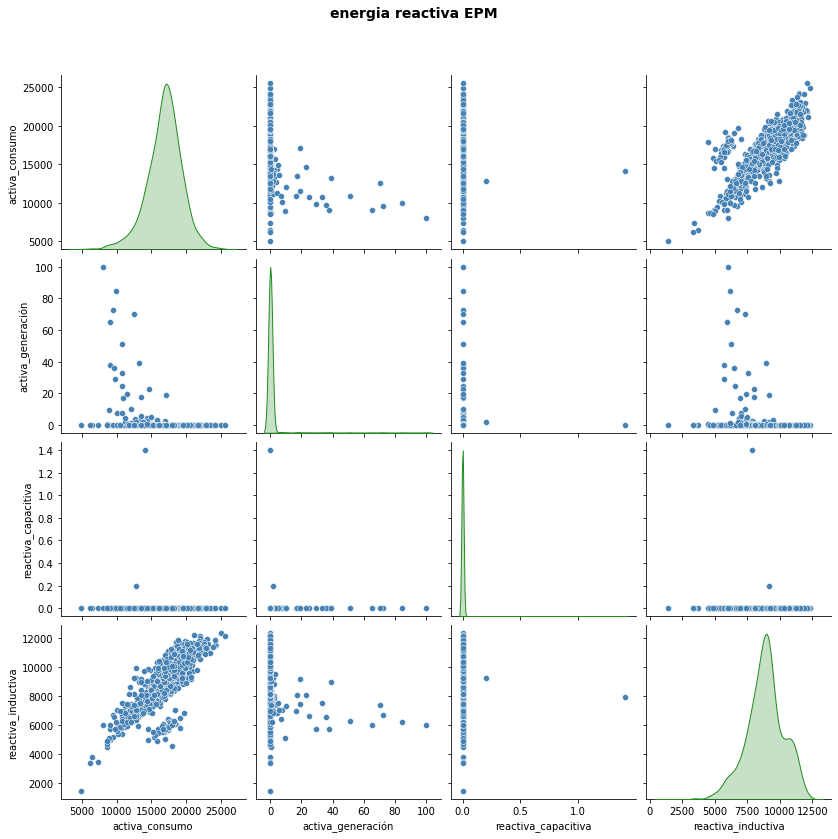

In [112]:
multiple_plot(1, df_reactiva_epm , numCols, None, 'scatterplot', 'energia reactiva EPM',30)

In [113]:
matrizCorr = df_reactiva_epm[numCols].corr()

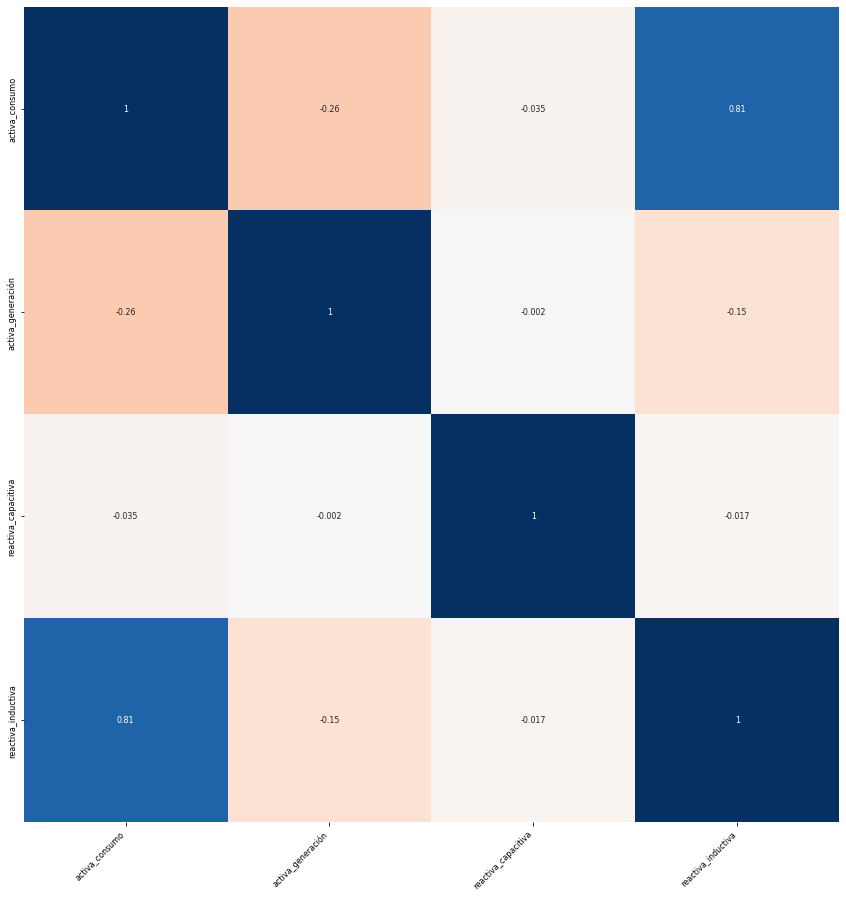

In [114]:
# Mapa de calor (Heatmap) de la matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    matrizCorr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu', #sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Se puede ver una relación entre las varibles energia_reactiva_inductiva y energia_activa_consumo

/tmp/ipykernel_13596/2406745150.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reactiva_epm['activa_consumo'])
/tmp/ipykernel_13596/2406745150.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_reactiva_epm['reactiva_inductiva'], palette='nipy_spectral')


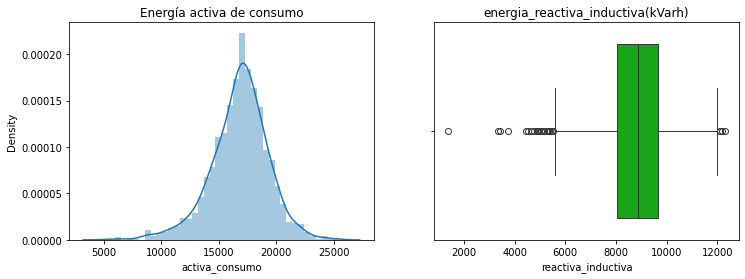

In [115]:
# 
"""
activa_consumo
activa_generación
reactiva_capacitiva
reactiva_inductiva
"""
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Energía activa de consumo')
sns.distplot(df_reactiva_epm['activa_consumo'])

plt.subplot(1,2,2)
plt.title('energia_reactiva_inductiva(kVarh)')
sns.boxplot(x=df_reactiva_epm['reactiva_inductiva'], palette='nipy_spectral')

plt.show()

## Datos atipicos


In [117]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(df_reactiva_epm['reactiva_inductiva'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_reactiva_epm['reactiva_inductiva'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')

Valor atípico leve inferior:5594.0
Valor atípico leve superior:12106.0


In [118]:
# Datos atipicos
cantidad_atipicos = df_reactiva_epm[df_reactiva_epm['reactiva_inductiva']>VASup]
print(f'La cantidad de datos atípicos a eliminar son: {cantidad_atipicos}')

#data = data.drop(data[data['Concrete compressive strength']>VASup].index)

#Reiniciar el indice
#data.reset_index(drop=True, inplace=True)

La cantidad de datos atípicos a eliminar son:      activa_consumo  activa_generación  reactiva_capacitiva  \
127         21936.0                0.0                  0.0   
59          24944.0                0.0                  0.0   
62          21136.0                0.0                  0.0   
85          25520.0                0.0                  0.0   

     reactiva_inductiva       date  
127             12112.0 2023-10-06  
59              12304.0 2024-02-29  
62              12176.0 2024-03-03  
85              12120.0 2024-03-26  
